#### Q1) Delivery time Prediction Build a simple linear regression model by performing EDA and do necessary transformations and select the best model 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
delivery=pd.read_csv("D:/Data Science/Assignments/4-Simple Linear Regression/delivery_time.csv")
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
delivery.rename(columns={"Delivery Time":"DeliveryTime","Sorting Time":"SortingTime"},inplace=True)

In [4]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
delivery.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

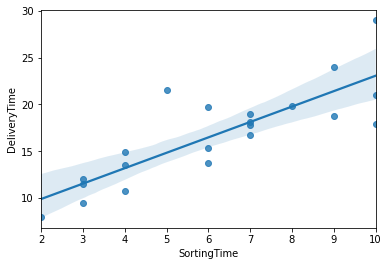

In [6]:
sns.regplot(x=delivery['SortingTime'],y=delivery['DeliveryTime'])

#### Correlation

In [7]:
delivery.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


#### Linear Regression Model

In [8]:

model=smf.ols("DeliveryTime~SortingTime",data=delivery).fit()


In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           3.98e-06
Time:                        23:41:16   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [11]:
model.pvalues ,model.tvalues

(Intercept      0.001147
 SortingTime    0.000004
 dtype: float64,
 Intercept      3.823349
 SortingTime    6.387447
 dtype: float64)

#### Model Predictions

In [12]:
New_delivery_time= pd.Series([5,10])
New_delivery_time

0     5
1    10
dtype: int64

In [13]:
prediction=pd.DataFrame(New_delivery_time,columns=["SortingTime"])
prediction

,SortingTime
0,5
1,10


In [14]:
model.predict(prediction)

0    14.827833
1    23.072933
dtype: float64

##### y=6.582734+1.649020 X

#### Q2) salary data Prediction Build a simple linear regression model by performing EDA and do necessary transformations and select the best model 

In [15]:
salary=pd.read_csv("D:/Data Science/Assignments/4-Simple Linear Regression/Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [16]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [17]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

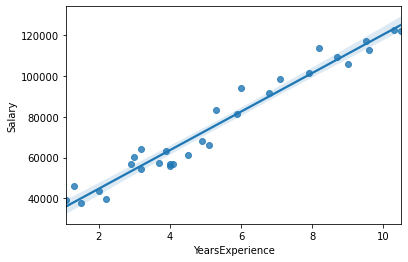

In [18]:
sns.regplot(x=salary["YearsExperience"],y=salary["Salary"])

#### Correlation

In [19]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Model Built

In [42]:
model=smf.ols("Salary~YearsExperience" ,data=salary).fit()

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.14e-20
Time:                        07:22:13   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [45]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [46]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [47]:
salary_hike=pd.Series([15,20])
salary_hike

0    15
1    20
dtype: int64

In [49]:
hike=pd.DataFrame(salary_hike,columns=["YearsExperience"])
hike

,YearsExperience
0,15
1,20


In [50]:
model.predict(hike)

0    167541.635020
1    214791.446628
dtype: float64

#### y= 25792.200199+9449.962321 X

   